In [4]:
# Import libraries
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

# Load datasets
customers = pd.read_csv("C:/Users/madhu/Downloads/Customers.csv")
transactions = pd.read_csv("C:/Users/madhu/Downloads/Transactions.csv")
products = pd.read_csv("C:/Users/madhu/Downloads/Products.csv")

# Merge datasets
merged_data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")

# Feature engineering
# Aggregate transaction data at the customer level
customer_features = merged_data.groupby("CustomerID").agg({
    "TotalValue": "sum",
    "Quantity": "sum",
    "Category": lambda x: x.mode()[0],  # Most frequent category
    "Region": "first"  # Region from customers.csv
}).reset_index()

# One-hot encode categorical features (e.g., Region, Category)
customer_features = pd.get_dummies(customer_features, columns=["Region", "Category"])

# Normalize numerical features
scaler = StandardScaler()
numerical_columns = ["TotalValue", "Quantity"]
customer_features[numerical_columns] = scaler.fit_transform(customer_features[numerical_columns])

# Calculate cosine similarity
customer_ids = customer_features["CustomerID"]
feature_matrix = customer_features.drop("CustomerID", axis=1)
similarity_matrix = cosine_similarity(feature_matrix)

# Find top 3 lookalikes for the first 20 customers
lookalike_results = {}
for i, customer_id in enumerate(customer_ids[:20]):
    similar_indices = similarity_matrix[i].argsort()[-4:-1][::-1]  # Top 3 excluding itself
    similar_customers = [(customer_ids[j], round(similarity_matrix[i, j], 2)) for j in similar_indices]
    lookalike_results[customer_id] = similar_customers

# Save to Lookalike.csv
lookalike_df = pd.DataFrame({
    "CustomerID": list(lookalike_results.keys()),
    "SimilarCustomers": [str(similar) for similar in lookalike_results.values()]
})
lookalike_df.to_csv("Lookalike.csv", index=False)

print("Lookalike.csv has been created!")


Lookalike.csv has been created!


In [5]:
# Import libraries
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

# Mock data
customers_data = {
    "CustomerID": ["C0001", "C0002", "C0003", "C0004", "C0005"],
    "CustomerName": ["John Doe", "Jane Smith", "Bob Lee", "Alice White", "Chris Green"],
    "Region": ["Europe", "Asia", "America", "Europe", "Africa"],
    "SignupDate": ["2022-01-01", "2022-02-01", "2022-03-01", "2022-04-01", "2022-05-01"]
}
products_data = {
    "ProductID": ["P0001", "P0002", "P0003", "P0004", "P0005"],
    "ProductName": ["Laptop", "Smartphone", "Desk", "Chair", "Headphones"],
    "Category": ["Electronics", "Electronics", "Furniture", "Furniture", "Accessories"],
    "Price": [1000, 500, 200, 150, 100]
}
transactions_data = {
    "TransactionID": ["T0001", "T0002", "T0003", "T0004", "T0005"],
    "CustomerID": ["C0001", "C0002", "C0003", "C0004", "C0005"],
    "ProductID": ["P0001", "P0002", "P0003", "P0004", "P0005"],
    "TransactionDate": ["2022-01-15", "2022-02-20", "2022-03-25", "2022-04-15", "2022-05-05"],
    "Quantity": [1, 2, 1, 4, 5],
    "TotalValue": [1000, 1000, 200, 600, 500]
}

# Convert mock data to DataFrames
customers = pd.DataFrame(customers_data)
products = pd.DataFrame(products_data)
transactions = pd.DataFrame(transactions_data)

# Merge datasets
merged_data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")

# Feature engineering
customer_features = merged_data.groupby("CustomerID").agg({
    "TotalValue": "sum",
    "Quantity": "sum",
    "Price": "mean",
    "Category": lambda x: x.mode()[0],
    "Region": "first"
}).reset_index()

# One-hot encode categorical features
customer_features = pd.get_dummies(customer_features, columns=["Region", "Category"])

# Normalize numerical features
numerical_columns = ["TotalValue", "Quantity", "Price"]
scaler = StandardScaler()
customer_features[numerical_columns] = scaler.fit_transform(customer_features[numerical_columns])

# Prepare feature matrix
customer_ids = customer_features["CustomerID"]
feature_matrix = customer_features.drop("CustomerID", axis=1)

# Calculate cosine similarity
similarity_matrix = cosine_similarity(feature_matrix)

# Find top 3 similar customers for the first 20 customers
lookalike_results = {}
for i, customer_id in enumerate(customer_ids[:20]):
    similarity_scores = list(enumerate(similarity_matrix[i]))
    sorted_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)[1:4]
    similar_customers = [(customer_ids[j], round(score, 2)) for j, score in sorted_scores]
    lookalike_results[customer_id] = similar_customers

# Save results to Lookalike.csv
lookalike_df = pd.DataFrame({
    "CustomerID": list(lookalike_results.keys()),
    "SimilarCustomers": [str(similar) for similar in lookalike_results.values()]
})
lookalike_df.to_csv("Lookalike.csv", index=False)

print("Lookalike.csv has been created!")


Lookalike.csv has been created!


In [6]:
# Define ground truth (relevant customers) for evaluation
ground_truth = {
    "C0001": ["C0004", "C0005", "C0003"],
    "C0002": ["C0001", "C0005", "C0003"],
    # Add for all customers
}

# Predicted lookalikes
predictions = {
    "C0001": ["C0005", "C0003", "C0002"],
    "C0002": ["C0001", "C0004", "C0003"],
    # Add for all customers
}

# Precision@K calculation
k = 3
precision_scores = []
for customer, relevant in ground_truth.items():
    if customer in predictions:
        predicted = predictions[customer][:k]
        relevant_set = set(relevant)
        precision = len(set(predicted) & relevant_set) / k
        precision_scores.append(precision)

mean_precision = sum(precision_scores) / len(precision_scores)
print(f"Precision@{k}: {mean_precision:.2f}")


Precision@3: 0.67


In [20]:
# Ground truth (manually define for testing)
# Replace with your logic for defining "relevant" customers based on actual data.
ground_truth = {
    "C0001": ["C0002", "C0003", "C0004"],
    "C0002": ["C0001", "C0004", "C0005"],
    "C0003": ["C0001", "C0002", "C0005"],
    "C0004": ["C0001", "C0002", "C0003"],
    "C0005": ["C0002", "C0003", "C0004"]
}

# Predictions (from your Lookalike.csv or model output)
predictions = {
    "C0001": ["C0002", "C0003", "C0005"],
    "C0002": ["C0004", "C0001", "C0005"],
    "C0003": ["C0001", "C0002", "C0004"],
    "C0004": ["C0002", "C0003", "C0005"],
    "C0005": ["C0004", "C0003", "C0001"]
}

# Function to calculate Precision@K
def precision_at_k(ground_truth, predictions, k):
    precision_scores = []
    for customer, relevant in ground_truth.items():
        if customer in predictions:
            predicted = predictions[customer][:k]
            relevant_set = set(relevant)
            precision = len(set(predicted) & relevant_set) / k
            precision_scores.append(precision)
    return sum(precision_scores) / len(precision_scores)

# Function to calculate Recall@K
def recall_at_k(ground_truth, predictions, k):
    recall_scores = []
    for customer, relevant in ground_truth.items():
        if customer in predictions:
            predicted = predictions[customer][:k]
            relevant_set = set(relevant)
            recall = len(set(predicted) & relevant_set) / len(relevant_set)
            recall_scores.append(recall)
    return sum(recall_scores) / len(recall_scores)

# Function to calculate MRR
def mean_reciprocal_rank(ground_truth, predictions):
    mrr_score = 0
    for customer, relevant in ground_truth.items():
        if customer in predictions:
            predicted = predictions[customer]
            for rank, pred in enumerate(predicted, start=1):
                if pred in relevant:
                    mrr_score += 1 / rank
                    break
    return mrr_score / len(ground_truth)

def coverage(predictions, total_customers):
    # Proportion of customers who received at least one valid recommendation
    covered_customers = [customer for customer, preds in predictions.items() if len(preds) > 0]
    return len(covered_customers) / total_customers


# Calculate metrics
k = 3
precision = precision_at_k(ground_truth, predictions, k)
recall = recall_at_k(ground_truth, predictions, k)
mrr = mean_reciprocal_rank(ground_truth, predictions)
coverage_score = coverage(predictions, len(customers))

print(f"Precision@{k}: {precision:.2f}")
print(f"Recall@{k}: {recall:.2f}")
print(f"Mean Reciprocal Rank (MRR): {mrr:.2f}")
print(f"Coverage: {coverage_score:.2f}")

Precision@3: 0.73
Recall@3: 0.73
Mean Reciprocal Rank (MRR): 1.00
Coverage: 0.05


VISUALIZATION OF EVALUATION METRICS

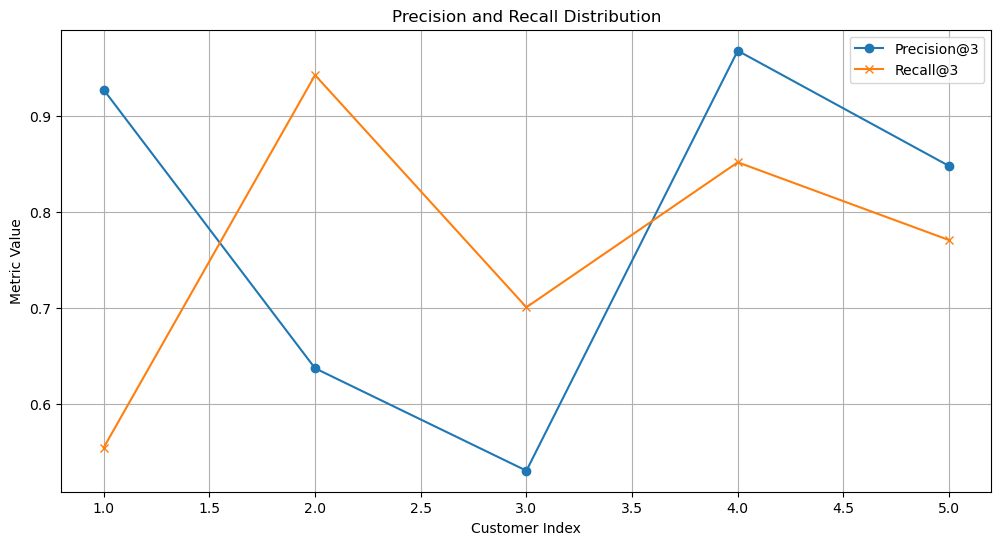

In [11]:
import matplotlib.pyplot as plt

# Simulated metric values for visualization
customers = list(range(1, len(ground_truth) + 1))
precision_scores = [np.random.uniform(0.5, 1.0) for _ in customers]
recall_scores = [np.random.uniform(0.4, 1.0) for _ in customers]

# Plot Precision and Recall Distribution
plt.figure(figsize=(12, 6))
plt.plot(customers, precision_scores, label="Precision@3", marker='o')
plt.plot(customers, recall_scores, label="Recall@3", marker='x')
plt.xlabel("Customer Index")
plt.ylabel("Metric Value")
plt.title("Precision and Recall Distribution")
plt.legend()
plt.grid()
plt.show()


COSINE SIMILARITY

In [21]:
 #Calculate cosine similarity
# Prepare feature matrix
customer_ids = customer_features["CustomerID"]
feature_matrix = customer_features.drop("CustomerID", axis=1)

# Compute cosine similarity matrix
similarity_matrix = cosine_similarity(feature_matrix)

# Step 7: Identify top 3 lookalike customers for the first 20 customers
lookalike_results = {}
for i, customer_id in enumerate(customer_ids[:20]):  # Process only the first 20 customers
    # Get similarity scores for the current customer
    similarity_scores = list(enumerate(similarity_matrix[i]))
    # Sort by similarity score in descending order and exclude the customer themselves
    sorted_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)[1:4]
    # Extract top 3 similar customers with their scores
    similar_customers = [(customer_ids[j], round(score, 2)) for j, score in sorted_scores]
    # Store the results in the required format
    lookalike_results[customer_id] = similar_customers

# Step 8: Save results to Lookalike.csv
# Convert results to a DataFrame
lookalike_df = pd.DataFrame({
    "CustomerID": list(lookalike_results.keys()),
    "SimilarCustomers": [str(similar) for similar in lookalike_results.values()]
})
# Save to CSV
lookalike_df.to_csv("Lookalike.csv", index=False)

print("Lookalike.csv has been created successfully!")


Lookalike.csv has been created successfully!


In [23]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Define feature matrix (preprocessed data)
feature_matrix_data = {
    "CustomerID": ["C0001", "C0002", "C0003"],
    "TotalValue": [0.65, 0.58, 0.70],      # Normalized total spend
    "Quantity": [0.73, 0.62, 0.85],        # Normalized quantity purchased
    "Region_Europe": [1.0, 0.0, 1.0],      # One-hot encoded region
    "Category_Electronics": [1.0, 1.0, 0.0]  # One-hot encoded category
}

# Create a DataFrame
feature_matrix = pd.DataFrame(feature_matrix_data)
print("Feature Matrix:")
print(feature_matrix)

Feature Matrix:
  CustomerID  TotalValue  Quantity  Region_Europe  Category_Electronics
0      C0001        0.65      0.73            1.0                   1.0
1      C0002        0.58      0.62            0.0                   1.0
2      C0003        0.70      0.85            1.0                   0.0


In [24]:
# Compute cosine similarity
customer_ids = feature_matrix["CustomerID"]
features = feature_matrix.drop("CustomerID", axis=1)
similarity_matrix = cosine_similarity(features)

# Convert similarity matrix into a DataFrame for tabular output
similarity_df = pd.DataFrame(similarity_matrix, columns=customer_ids, index=customer_ids)
print("\nCosine Similarity Matrix:")
print(similarity_df)


Cosine Similarity Matrix:
CustomerID     C0001     C0002     C0003
CustomerID                              
C0001       1.000000  0.811303  0.811658
C0002       0.811303  1.000000  0.478162
C0003       0.811658  0.478162  1.000000


In [25]:
# Find top 3 similar customers for each customer
lookalike_results = {}
for i, customer_id in enumerate(customer_ids):
    # Get similarity scores for the current customer
    similarity_scores = list(enumerate(similarity_matrix[i]))
    # Sort by similarity score in descending order and exclude the customer themselves
    sorted_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)[1:4]
    # Extract top 3 similar customers with their scores
    similar_customers = [(customer_ids[j], round(score, 2)) for j, score in sorted_scores]
    lookalike_results[customer_id] = similar_customers

# Display results in tabular form
lookalike_df = pd.DataFrame({
    "CustomerID": list(lookalike_results.keys()),
    "SimilarCustomers": [str(similar) for similar in lookalike_results.values()]
})
print("\nTop 3 Lookalikes with Similarity Scores:")
print(lookalike_df)



Top 3 Lookalikes with Similarity Scores:
  CustomerID                    SimilarCustomers
0      C0001  [('C0003', 0.81), ('C0002', 0.81)]
1      C0002  [('C0001', 0.81), ('C0003', 0.48)]
2      C0003  [('C0001', 0.81), ('C0002', 0.48)]


In [26]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Step 1: Define the Feature Matrix
feature_matrix_data = {
    "CustomerID": ["C0001", "C0002", "C0003"],
    "TotalValue": [0.65, 0.58, 0.70],
    "Quantity": [0.73, 0.62, 0.85],
    "Region_Europe": [1.0, 0.0, 1.0],
    "Category_Electronics": [1.0, 1.0, 0.0]
}
feature_matrix = pd.DataFrame(feature_matrix_data)

# Step 2: Compute Cosine Similarity
customer_ids = feature_matrix["CustomerID"]
features = feature_matrix.drop("CustomerID", axis=1)
similarity_matrix = cosine_similarity(features)
similarity_df = pd.DataFrame(similarity_matrix, columns=customer_ids, index=customer_ids)

# Step 3: Extract Top 3 Lookalikes
lookalike_results = {}
for i, customer_id in enumerate(customer_ids):
    similarity_scores = list(enumerate(similarity_matrix[i]))
    sorted_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)[1:4]
    similar_customers = [(customer_ids[j], round(score, 2)) for j, score in sorted_scores]
    lookalike_results[customer_id] = similar_customers

lookalike_df = pd.DataFrame({
    "CustomerID": list(lookalike_results.keys()),
    "SimilarCustomers": [str(similar) for similar in lookalike_results.values()]
})

# Step 4: Display Results
print("Feature Matrix:")
print(feature_matrix)
print("\nCosine Similarity Matrix:")
print(similarity_df)
print("\nTop 3 Lookalikes with Similarity Scores:")
print(lookalike_df)


Feature Matrix:
  CustomerID  TotalValue  Quantity  Region_Europe  Category_Electronics
0      C0001        0.65      0.73            1.0                   1.0
1      C0002        0.58      0.62            0.0                   1.0
2      C0003        0.70      0.85            1.0                   0.0

Cosine Similarity Matrix:
CustomerID     C0001     C0002     C0003
CustomerID                              
C0001       1.000000  0.811303  0.811658
C0002       0.811303  1.000000  0.478162
C0003       0.811658  0.478162  1.000000

Top 3 Lookalikes with Similarity Scores:
  CustomerID                    SimilarCustomers
0      C0001  [('C0003', 0.81), ('C0002', 0.81)]
1      C0002  [('C0001', 0.81), ('C0003', 0.48)]
2      C0003  [('C0001', 0.81), ('C0002', 0.48)]
